In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
data = pd.read_csv('tree_watering.csv')
print(data.head())


    humidity  temperature  weather_to_water
0  42.472407    14.628323                 0
1  77.042858    23.547524                 0
2  63.919637    31.823646                 0
3  55.919509    28.305622                 0
4  29.361118    30.164029                 1


In [ ]:
X = data[['humidity', 'temperature']]
y = data['weather_to_water']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       156
           1       0.75      0.75      0.75        44

    accuracy                           0.89       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.89      0.89      0.89       200

Confusion Matrix:
[[145  11]
 [ 11  33]]


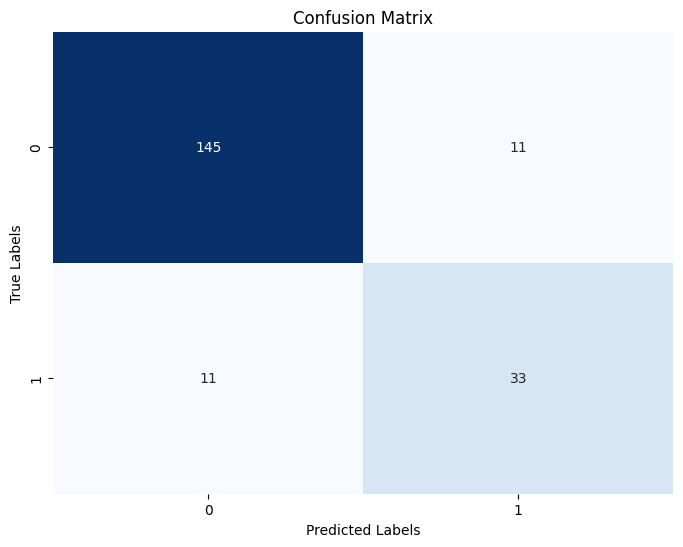

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


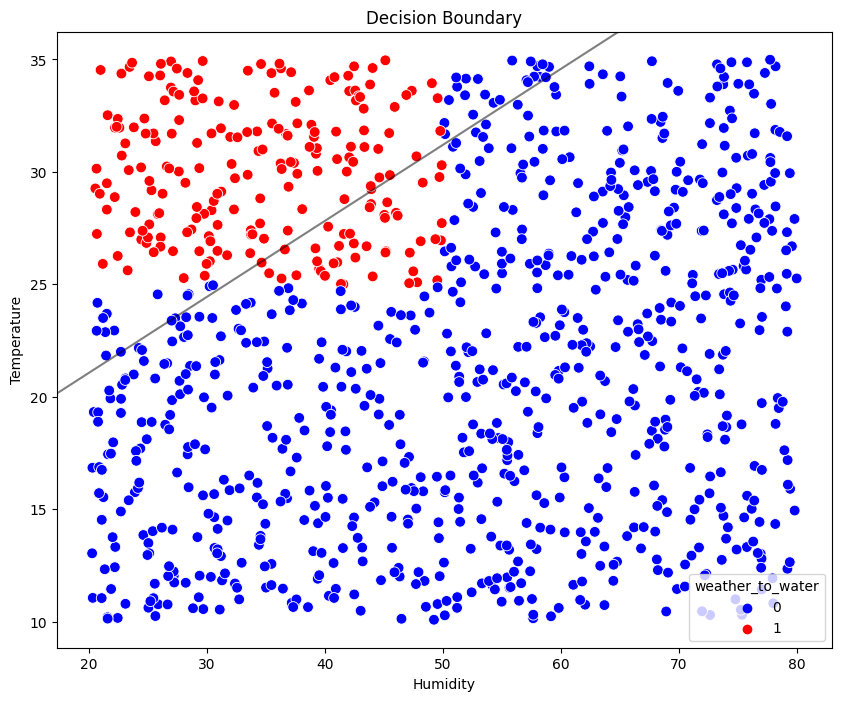

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting the decision boundary (scatter plot)
plt.figure(figsize=(10, 8))

# Plot data points
sns.scatterplot(x='humidity', y='temperature', hue='weather_to_water', data=data, palette={0: 'blue', 1: 'red'}, s=60)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.title('Decision Boundary')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()